In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [63]:
campaign = pd.read_csv("D:/Python NPN Training/Logistic Regression/campaigning.csv")

In [64]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
campaign.shape

(41188, 21)

In [5]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [6]:
campaign.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
campaign.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

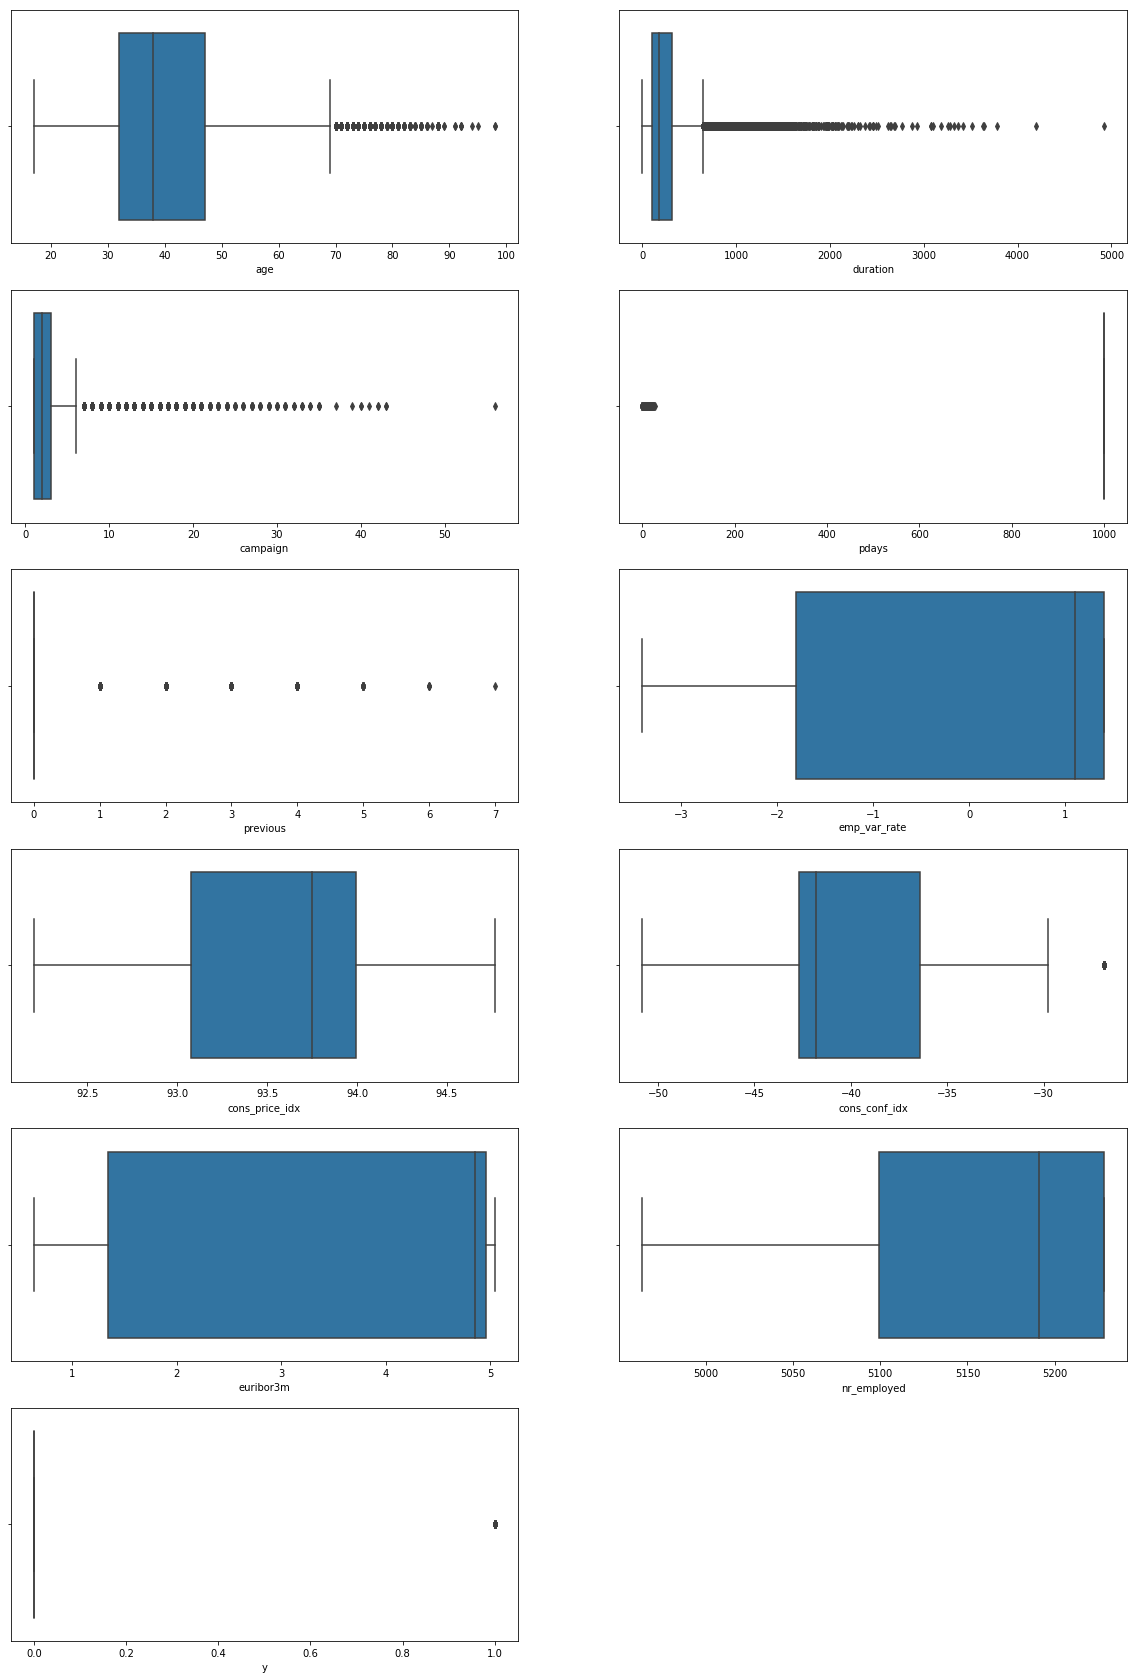

In [15]:
fig = plt.figure(figsize=(20,30))
j=1
for i in campaign.columns.tolist():
    if campaign[i].dtype != 'O':
        fig.add_subplot(6,2,j)
        sns.boxplot(campaign[i])
        plt.xlabel(i)
        j=j+1

In [18]:
def outlier(df):
    outlier={}
    for i in df.columns.tolist():
        if df[i].dtype!='O':
            Q1,Q3=np.percentile(df[i],[25,75])
            IQR=Q3-Q1
            upper_bound = Q3+(1.5*IQR)
            lower_bound = Q1-(1.5*IQR)
            outlier[i]=[upper_bound,lower_bound]  
        
    return outlier

In [19]:
outlier(campaign)

{'age': [69.5, 9.5],
 'duration': [644.5, -223.5],
 'campaign': [6.0, -2.0],
 'pdays': [999.0, 999.0],
 'previous': [0.0, 0.0],
 'emp_var_rate': [6.200000000000001, -6.6000000000000005],
 'cons_price_idx': [95.3725, 91.69650000000001],
 'cons_conf_idx': [-26.949999999999992, -52.150000000000006],
 'euribor3m': [10.3865, -4.081499999999999],
 'nr_employed': [5421.6, 4905.6],
 'y': [0.0, 0.0]}

In [21]:
campaign[campaign['age']>70].shape

(422, 21)

In [22]:
campaign[campaign['duration']>650].shape

(2915, 21)

In [25]:
campaign[campaign['campaign']>10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
38,44,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,...,25,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
39,54,management,married,university.degree,no,yes,yes,cellular,aug,thu,...,11,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
59,26,blue-collar,married,high.school,no,yes,no,telephone,jun,wed,...,12,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
75,45,services,married,professional.course,no,no,no,telephone,aug,thu,...,18,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
133,30,technician,single,university.degree,no,yes,no,cellular,aug,thu,...,17,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40833,42,admin.,married,university.degree,no,no,yes,cellular,jul,thu,...,25,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
40956,47,self-employed,married,university.degree,no,yes,no,cellular,aug,tue,...,13,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
40975,31,technician,single,professional.course,unknown,no,no,telephone,aug,thu,...,14,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
41007,36,housemaid,married,high.school,no,yes,no,telephone,jun,fri,...,11,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0


In [28]:
campaign[campaign['pdays']==999].shape

(39673, 21)

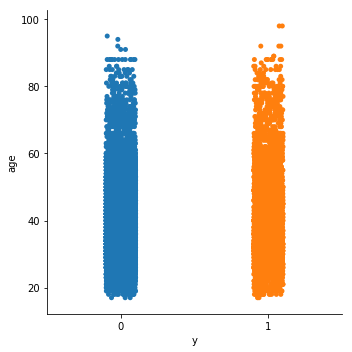

In [30]:
sns.catplot(x='y',y='age',data=campaign)

In [44]:
campaign['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [46]:
campaign['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [31]:
import scipy.stats as stat

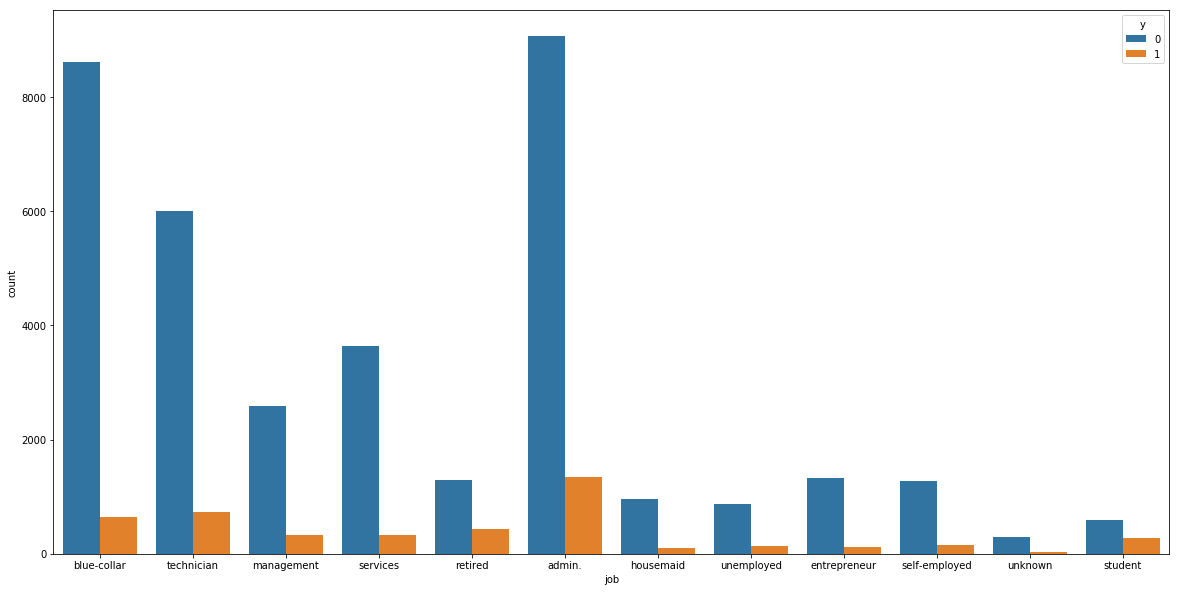

In [40]:
fig = plt.figure(figsize=(20,10))
sns.countplot(campaign['job'],hue=campaign['y'])

In [34]:
job_data = pd.crosstab(campaign['job'],campaign['y'])

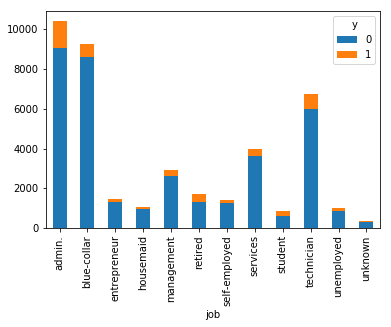

In [36]:
job_data.plot(kind='bar',stacked=True)

In [42]:
chi2,p,dof,expected = stat.chi2_contingency(job_data)

In [43]:
print(p)

4.189763287563623e-199


In [10]:
education_data = pd.crosstab(campaign['education'],campaign['y'])

AttributeError: Unknown property type

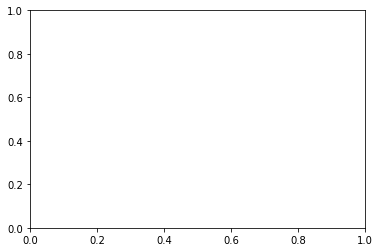

In [11]:
education_data.plot(type='bar')

In [12]:
help(education_data.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame using the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'scatter' : scatter plot
 |

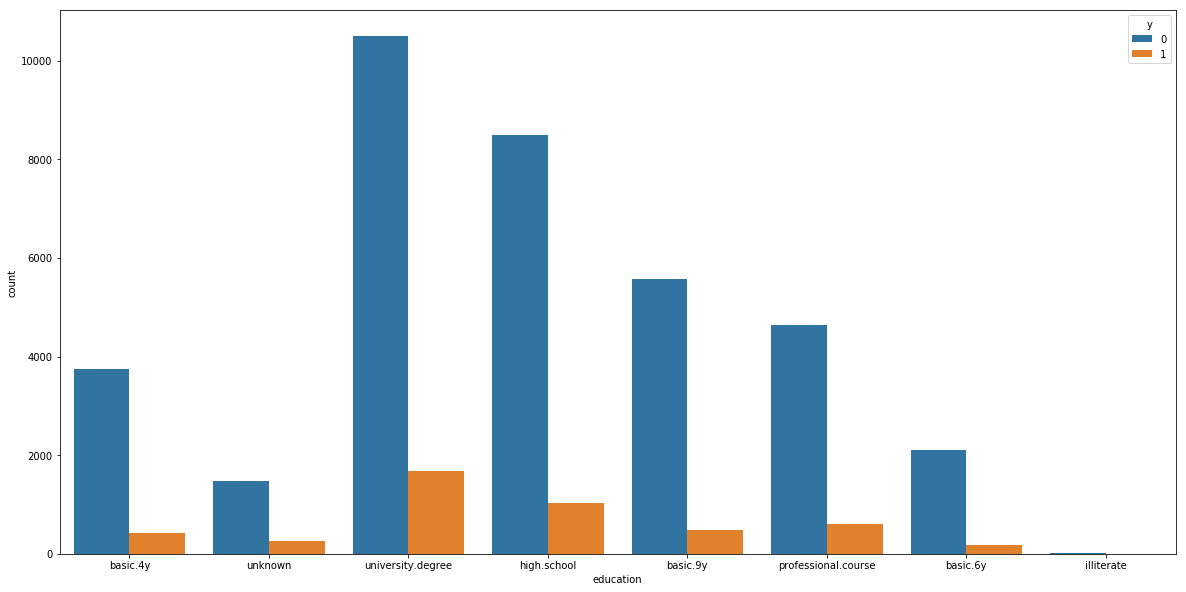

In [50]:
fig = plt.figure(figsize=(20,10))
sns.countplot(campaign['education'],hue=campaign['y'])

In [51]:
chi2,p,dof,expected = stat.chi2_contingency(education_data)

In [52]:
print(p)

3.3051890144025054e-38


In [41]:
help(stat.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

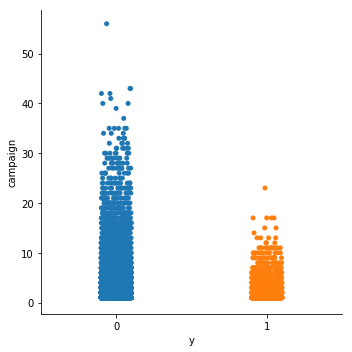

In [54]:
sns.catplot(x='y',y='campaign',data=campaign)

In [13]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [53]:
job_data = pd.crosstab(campaign['job'],campaign['y'])

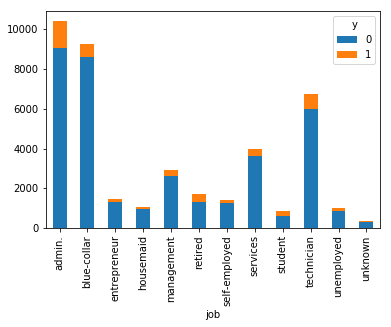

In [55]:
job_data.plot(kind='bar',stacked=True)

In [56]:
np.unique(campaign['education'])

array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype=object)

In [68]:
campaign['education'] = np.where(campaign['education']=='basic.4y','Basic',campaign['education'])
campaign['education'] = np.where(campaign['education']=='basic.6y','Basic',campaign['education'])
campaign['education'] = np.where(campaign['education']=='basic.9y','Basic',campaign['education'])

In [69]:
np.unique(campaign['education'])

array(['Basic', 'high.school', 'illiterate', 'professional.course',
       'university.degree', 'unknown'], dtype=object)

In [94]:
campaign['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [96]:
campaign_data = campaign.drop(['emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'],axis=1)
features = campaign_data.drop(['y'],axis=1)
target = campaign_data['y']

In [97]:
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,137,1,3,1,success


In [98]:
features_dummy = pd.get_dummies(features,drop_first=True)

In [100]:
features_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 46 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
job_unknown                      41188 non-null uint8
marital_married            

In [101]:
target.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [102]:
features_dummy.shape

(41188, 46)

In [126]:
features_dummy = sm.add_constant(features_dummy)

C:\Users\Santosh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
feature_train,feature_test,target_train,target_test = train_test_split(features_dummy,target,test_size=0.3,stratify=target,random_state=42)

In [129]:
feature_train.head()

,const,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
8000,1.0,26,106,1,999,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4586,1.0,59,177,1,999,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
37741,1.0,28,166,6,999,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10545,1.0,47,153,18,999,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
19301,1.0,36,1877,1,999,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [130]:
feature_train.shape

(28831, 47)

In [131]:
target_train.shape

(28831,)

In [132]:
import statsmodels.api as sm

In [133]:
log_model = sm.Logit(target_train,feature_train).fit()

         Current function value: 0.230285
         Iterations: 35


C:\Users\Santosh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [139]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28785
Method:                           MLE   Df Model:                           45
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.3458
Time:                        10:54:20   Log-Likelihood:                -6639.3
converged:                      False   LL-Null:                       -10149.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.1301      0.345     -6.182      0.000      -2.805      -1.455
age                               0.0055      0.003      1.974      0.048    4.01e-05       0.011
duration                          0.0043   8.18e-05     52.244      0.000       0.004       0.004
campaign                         -0.0681      0.013     -5.062      0.000      -0.094      -0.042
pdays                            -0.0011      0.000     -4.167      0.000      -0.002      -0.001
previous                          0.1863      0.070      2.670      0.008       0.050       0.323
job_blue-collar                  -0.2851      0.091     -3.130      0.002      -0.464      -0.107
job_entrepreneur                 -0.3150      0.147     -2.145      0.032      -0.603      -0.027
job_housemaid                     0.0781      0.164      0.477      0.633      -0.243       0.399
job_management                   -0.1077      0.099     -1.093      0.274      -0.301       0.085
job_retired                       0.6642      0.119      5.566      0.000       0.430       0.898
job_self-employed                -0.1367      0.135     -1.014      0.310      -0.401       0.127
job_services                     -0.2014      0.098     -2.054      0.040      -0.394      -0.009
job_student                       0.7437      0.127      5.854      0.000       0.495       0.993
job_technician                   -0.1048      0.081     -1.297      0.195      -0.263       0.054
job_unemployed                    0.1342      0.148      0.910      0.363      -0.155       0.423
job_unknown                       0.0699      0.280      0.250      0.803      -0.479       0.619
marital_married                   0.0458      0.078      0.585      0.559      -0.108       0.199
marital_single                    0.1874      0.089      2.104      0.035       0.013       0.362
marital_unknown                  -0.0913      0.471     -0.194      0.846      -1.015       0.832
education_high.school             0.0327      0.079      0.412      0.680      -0.123       0.188
education_illiterate              1.1581      0.786      1.473      0.141      -0.383       2.699
education_professional.course     0.1693      0.094      1.794      0.073      -0.016       0.354
education_university.degree       0.2478      0.080      3.093      0.002       0.091       0.405
education_unknown                 0.3584      0.119      3.023      0.003       0.126       0.591
default_unknown                  -0.6655      0.076     -8.712      0.000      -0.815      -0.516
default_yes                     -17.6800   2.32e+04     -0.001      0.999   -4.56e+04    4.55e+04
housing_unknown                  -0.0390   1.26e+07  -3.09e-09      1.000   -2.48e+07    2.48e+07
housing_yes                      -0.0305      0.047     -0.647      0.517      -0.123       0.062
loan_unknown                     -0.0390   1.26e+07  -3.09e-09      1.000   -2.48e+07    2.48e+07
loan_ye

In [143]:
features_train_fn = feature_train.drop(['job_housemaid','job_management','job_self-employed','job_technician','job_unemployed','job_unknown','marital_married','marital_unknown',
'education_high.school','default_yes','housing_unknown','housing_yes','loan_unknown',
'job_services','education_illiterate','education_professional.course','loan_yes','month_jun','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','poutcome_nonexistent'],axis=1)

In [144]:
log_model = sm.Logit(target_train,features_train_fn).fit()

Optimization terminated successfully.
         Current function value: 0.230897
         Iterations 8


In [145]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28807
Method:                           MLE   Df Model:                           23
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.3441
Time:                        11:03:18   Log-Likelihood:                -6657.0
converged:                       True   LL-Null:                       -10149.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.9459      0.290     -6.720      0.000      -2.513      -1.378
age                             0.0052      0.003      1.923      0.054      -0.000       0.011
duration                        0.0043   8.15e-05     52.366      0.000       0.004       0.004
campaign                       -0.0702      0.013     -5.207      0.000      -0.097      -0.044
pdays                          -0.0011      0.000     -4.376      0.000      -0.002      -0.001
previous                        0.1444      0.045      3.180      0.001       0.055       0.233
job_blue-collar                -0.2465      0.070     -3.539      0.000      -0.383      -0.110
job_entrepreneur               -0.2577      0.141     -1.826      0.068      -0.534       0.019
job_retired                     0.7150      0.110      6.504      0.000       0.500       0.930
job_student                     0.7832      0.121      6.477      0.000       0.546       1.020
marital_single                  0.1536      0.058      2.666      0.008       0.041       0.267
education_university.degree     0.2052      0.053      3.848      0.000       0.101       0.310
education_unknown               0.3105      0.109      2.839      0.005       0.096       0.525
default_unknown                -0.6710      0.076     -8.848      0.000      -0.820      -0.522
contact_telephone              -1.0619      0.065    -16.463      0.000      -1.188      -0.935
month_aug                      -0.7328      0.079     -9.288      0.000      -0.887      -0.578
month_dec                       0.5888      0.228      2.585      0.010       0.142       1.035
month_jul                      -0.9152      0.079    -11.540      0.000      -1.071      -0.760
month_mar                       1.4659      0.127     11.586      0.000       1.218       1.714
month_may                      -0.9070      0.069    -13.191      0.000      -1.042      -0.772
month_nov                      -0.9318      0.090    -10.364      0.000      -1.108      -0.756
month_oct                       0.9163      0.123      7.466      0.000       0.676       1.157
month_sep                       0.5612      0.137      4.106      0.000       0.293       0.829
poutcome_success                1.1697      0.245      4.783      0.000       0.690       1.649
===============================================================================================
"""

In [146]:
features_test_fn = feature_test.drop(['job_housemaid','job_management','job_self-employed','job_technician','job_unemployed','job_unknown','marital_married','marital_unknown',
'education_high.school','default_yes','housing_unknown','housing_yes','loan_unknown',
'job_services','education_illiterate','education_professional.course','loan_yes','month_jun','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','poutcome_nonexistent'],axis=1)

In [147]:
prediction = log_model.predict(features_test_fn)

In [149]:
prediction.head()

10812    0.051359
3840     0.059374
13130    0.026884
1752     0.345608
35534    0.172696
dtype: float64

In [151]:
class_prediction = np.where(prediction>=0.5,1,0)

In [152]:
pd.crosstab(target_test,class_prediction)

col_0,0,1
y,,
0,10732,233
1,891,501


In [153]:
from sklearn.metrics import accuracy_score

In [155]:
print(accuracy_score(target_test,class_prediction))

0.9090394108602412


In [156]:
(10732+501)/(10732+501+233+891)

0.9090394108602412

In [157]:
from sklearn.metrics import classification_report

In [158]:
print(classification_report(target_test,class_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.68      0.36      0.47      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357



In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
log_reg = LogisticRegression()

In [161]:
log_reg.fit(features_train_fn,target_train)

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
sklearn_predict = log_reg.predict(features_test_fn)

In [164]:
sklearn_predict[1:5]

array([0, 0, 0, 0], dtype=int64)

In [166]:
log_reg.predict_proba(features_test_fn)[:,1]

array([0.05199816, 0.06048815, 0.02755421, ..., 0.02085568, 0.03068189,
       0.1635919 ])

In [169]:
from sklearn.metrics import roc_curve,roc_auc_score

In [171]:
fpr,tpr,threshold = roc_curve(target_test,log_reg.predict_proba(features_test_fn)[:,1])

In [175]:
auc = roc_auc_score(target_test,sklearn_predict)

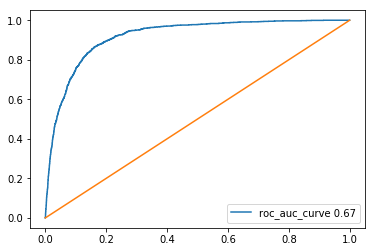

In [178]:
plt.plot(fpr,tpr,label='roc_auc_curve %0.2f'%auc)
plt.plot([0,1],[0,1])
plt.legend()

In [185]:
fpr_tpr = pd.DataFrame({'fpr':pd.Series(fpr),'tpr':pd.Series(tpr),'threshold':pd.Series(threshold)})

In [186]:
fpr_tpr.head()

,fpr,tpr,threshold
0,0.000000,0.000000,1.999998
1,0.000091,0.000000,0.999998
2,0.000091,0.001437,0.999994
3,0.000274,0.001437,0.999973
4,0.000274,0.002155,0.999972


In [188]:
fpr_tpr[(fpr_tpr['threshold']>0.5)&(fpr_tpr['threshold']<0.51)]

,fpr,tpr,threshold
284,0.020611,0.354167,0.508552
285,0.020611,0.354885,0.508106
286,0.020702,0.354885,0.508043
287,0.020702,0.357040,0.506249
288,0.020793,0.357040,0.505821
289,0.020793,0.357759,0.505549
290,0.021067,0.357759,0.504393
291,0.021067,0.359914,0.503333
292,0.021432,0.359914,0.502117
293,0.021432,0.361351,0.501337


In [15]:
campaign_data = campaign.drop(['emp_var_rate','cons_price_idx','euribor3m','nr_employed'],axis=1)

In [16]:
campaign_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons_conf_idx', 'y'],
      dtype='object')

In [18]:
campaign_data_dummy = pd.get_dummies(campaign_data,drop_first=True)

In [19]:
features = campaign_data_dummy.drop(['y'],axis=1)

In [20]:
target = campaign_data_dummy['y']

In [23]:
log_model = sm.Logit(target,features).fit()

         Current function value: 0.226683
         Iterations: 35


C:\Users\Santosh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41140
Method:                           MLE   Df Model:                           47
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.3561
Time:                        08:00:50   Log-Likelihood:                -9336.6
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0064      0.002      2.756      0.006       0.002       0.011
duration                          0.0043   6.96e-05     62.423      0.000       0.004       0.004
campaign                         -0.0709      0.012     -5.692      0.000      -0.095      -0.046
pdays                            -0.0010      0.000     -6.137      0.000      -0.001      -0.001
previous                          0.2662      0.057      4.655      0.000       0.154       0.378
cons_conf_idx                     0.0526      0.004     13.167      0.000       0.045       0.060
job_blue-collar                  -0.2982      0.077     -3.896      0.000      -0.448      -0.148
job_entrepreneur                 -0.2877      0.121     -2.372      0.018      -0.525      -0.050
job_housemaid                    -0.0230      0.140     -0.164      0.870      -0.298       0.252
job_management                   -0.1428      0.083     -1.730      0.084      -0.305       0.019
job_retired                       0.5416      0.102      5.315      0.000       0.342       0.741
job_self-employed                -0.1987      0.117     -1.704      0.088      -0.427       0.030
job_services                     -0.2085      0.084     -2.490      0.013      -0.373      -0.044
job_student                       0.6908      0.108      6.383      0.000       0.479       0.903
job_technician                   -0.1327      0.068     -1.965      0.049      -0.265      -0.000
job_unemployed                    0.1541      0.123      1.255      0.209      -0.087       0.395
job_unknown                       0.0165      0.232      0.071      0.943      -0.439       0.472
marital_married                   0.0514      0.065      0.791      0.429      -0.076       0.179
marital_single                    0.2358      0.074      3.191      0.001       0.091       0.381
marital_unknown                   0.0388      0.403      0.096      0.923      -0.750       0.828
education_basic.6y                0.1018      0.116      0.875      0.382      -0.126       0.330
education_basic.9y               -0.0288      0.096     -0.300      0.765      -0.217       0.160
education_high.school             0.0586      0.087      0.675      0.499      -0.112       0.229
education_illiterate              1.2472      0.702      1.777      0.076      -0.129       2.623
education_professional.course     0.1425      0.103      1.385      0.166      -0.059       0.344
education_university.degree       0.2474      0.087      2.852      0.004       0.077       0.417
education_unknown                 0.2692      0.114      2.356      0.018       0.045       0.493
default_unknown                  -0.6555      0.064    -10.165      0.000      -0.782      -0.529
default_yes                      -9.8754    390.714     -0.025      0.980    -775.660     755.909
housing_unknown                  -0.0228    4.3e+16   -5.3e-19      1.000   -8.43e+16    8.43e+16
housing

In [25]:
prediction = log_model.predict(features)

In [29]:
prediction_class = np.where(prediction>=0.50,1,0)

In [30]:
pd.crosstab(target,prediction_class)

col_0,0,1
y,,
0,35662,886
1,2919,1721


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(target,prediction_class))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     36548
           1       0.66      0.37      0.47      4640

    accuracy                           0.91     41188
   macro avg       0.79      0.67      0.71     41188
weighted avg       0.89      0.91      0.90     41188



In [37]:
from sklearn.metrics import roc_curve,roc_auc_score

In [40]:
fpr,tpr,threshold = roc_curve(target,prediction)

In [42]:
fpr

array([0.00000000e+00, 2.73612783e-05, 5.47225566e-05, ...,
       9.63718945e-01, 9.63718945e-01, 1.00000000e+00])

In [47]:
auc = roc_auc_score(target,prediction_class)

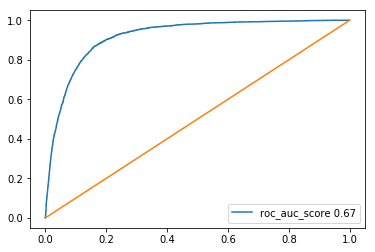

In [51]:
plt.plot(fpr,tpr,label='roc_auc_score %0.2f' %auc)
plt.plot([0,1],[0,1])
plt.legend()